# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observation
----

1. Cities closest to latitude 0 shows higher temperature than cities that are nearby latitdue -90 and 90.

2. From the linear regression, cloudiness, humidity and wind speed have weak relationship with latitude. 

3. Due to sun and rotation of earth and calendar date (currently in July in US), northern hemisphere temeperature is higher than southern hemisphere. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
tempUnits = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# define baseURL and queryURL
baseURL = "https://api.openweathermap.org/data/2.5/weather?"
queryURL = f"{baseURL}appid={weather_api_key}&units={tempUnits}&q="

# create empty list for data to be stored
cityNameList = []
latList = []
longList = []
maxTemp = []
humidity = []
cloudCov = []
windSpeed = []
countryList = []
dateTime = []

# set initial count quanities
indexCounter = 0
setCounter = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# create loop to run in the cities list
for index, city in enumerate (cities, start = 1):
    try:
        response = requests.get(queryURL + city).json()
        cityNameList.append(response["name"])
        latList.append(response["coord"]["lat"])
        longList.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudCov.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        countryList.append(response["sys"]["country"])
        dateTime.append(response["dt"])
        if indexCounter > 49:
            indexCounter = 0
            setCounter = setCounter + 1
            
        else:
            indexCounter = indexCounter + 1
            
        print(f"Processing Record {indexCounter} of Set {setCounter} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | mlandizi
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | takoradi
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | poronaysk
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | palpa
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | auki
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | tomatlan
Processing Record 15 of Set 1 | stephenville
Processing Record 16 of Set 1 | lata
City not found. Skipping...
Processing Record 17 of Set 1 | flinders
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | kariba
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | fortuna
P

Processing Record 33 of Set 4 | adrar
Processing Record 34 of Set 4 | norman wells
Processing Record 35 of Set 4 | quatre cocos
Processing Record 36 of Set 4 | poyarkovo
Processing Record 37 of Set 4 | marystown
Processing Record 38 of Set 4 | olafsvik
Processing Record 39 of Set 4 | piltene
City not found. Skipping...
Processing Record 40 of Set 4 | mount isa
Processing Record 41 of Set 4 | shimoda
Processing Record 42 of Set 4 | arlit
Processing Record 43 of Set 4 | linhai
Processing Record 44 of Set 4 | jalu
City not found. Skipping...
Processing Record 45 of Set 4 | chimbote
Processing Record 46 of Set 4 | kosh-agach
City not found. Skipping...
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | abu samrah
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | izhma
Processing Record 0 of Set 5 | yulara
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | shalyhyne
Processing Record 3 of Set 5 | shush
Processing Recor

Processing Record 21 of Set 8 | port lincoln
Processing Record 22 of Set 8 | mehran
Processing Record 23 of Set 8 | paamiut
Processing Record 24 of Set 8 | teahupoo
Processing Record 25 of Set 8 | segezha
Processing Record 26 of Set 8 | rawson
Processing Record 27 of Set 8 | hovd
Processing Record 28 of Set 8 | bosaso
Processing Record 29 of Set 8 | billings
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | qaqortoq
Processing Record 32 of Set 8 | tual
Processing Record 33 of Set 8 | pekan
City not found. Skipping...
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | moissala
Processing Record 36 of Set 8 | novominskaya
Processing Record 37 of Set 8 | omboue
Processing Record 38 of Set 8 | humlebaek
Processing Record 39 of Set 8 | bonthe
Processing Record 40 of Set 8 | marzuq
Processing Record 41 of Set 8 | emboscada
Processing Record 42 of Set 8 | elat
Processing Record 43 of Set 8 | mayumba
Processing Record 44 of Set 8 | mao
Processing Reco

Processing Record 7 of Set 12 | la libertad
Processing Record 8 of Set 12 | richards bay
Processing Record 9 of Set 12 | launceston
Processing Record 10 of Set 12 | talara
City not found. Skipping...
Processing Record 11 of Set 12 | olga
Processing Record 12 of Set 12 | kawambwa
Processing Record 13 of Set 12 | kapit
City not found. Skipping...
Processing Record 14 of Set 12 | haimen
Processing Record 15 of Set 12 | abadiania
City not found. Skipping...
Processing Record 16 of Set 12 | biak
Processing Record 17 of Set 12 | mopipi
Processing Record 18 of Set 12 | angoche
Processing Record 19 of Set 12 | hlipiceni
Processing Record 20 of Set 12 | mayya
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# dictionary to create dataframe
weatherDict = {
    "City": cityNameList,
    "Lat": latList,
    "Lng": longList,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness": cloudCov,
    "Wind Speed": windSpeed,
    "Country": countryList,
    "Date": dateTime    
}

weatherDF = pd.DataFrame(weatherDict)

weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,58.28,96,24,4.76,UY,1658888781
1,Mlandizi,-6.7000,38.7333,66.25,97,10,3.67,TZ,1658888781
2,Port Alfred,-33.5906,26.8910,61.18,65,44,5.01,ZA,1658888781
3,Busselton,-33.6500,115.3333,55.35,73,100,8.37,AU,1658888782
4,Takoradze,4.8845,-1.7554,74.59,91,93,9.37,GH,1658888782


In [5]:
# export data to csv
weatherDF.to_csv("../output_data/cities.csv")

In [6]:
weatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.294841,17.031456,69.813614,72.280551,55.268503,7.632444,1.658889e+09
std,32.541830,89.325613,13.468713,21.083548,40.062583,5.208203,9.979527e+01
min,-54.800000,-179.166700,32.110000,1.000000,0.000000,0.000000,1.658888e+09
25%,-3.944300,-59.593900,59.680000,63.000000,13.000000,3.600000,1.658889e+09
50%,22.266700,20.040300,71.240000,77.000000,63.000000,6.330000,1.658889e+09
75%,47.703300,92.750000,80.370000,88.000000,99.000000,10.470000,1.658889e+09
max,78.218600,179.316700,100.810000,100.000000,100.000000,27.630000,1.658889e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weatherDF["Humidity"].describe()

count    581.000000
mean      72.280551
std       21.083548
min        1.000000
25%       63.000000
50%       77.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [8]:
#  Get the indices of cities that have humidity over 100%.
humidityOver100 = weatherDF[(weatherDF["Humidity"] <= 100)].index
humidityOver100

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            571, 572, 573, 574, 575, 576, 577, 578, 579, 580],
           dtype='int64', length=581)

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weatherDF.drop(humidityOver100, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

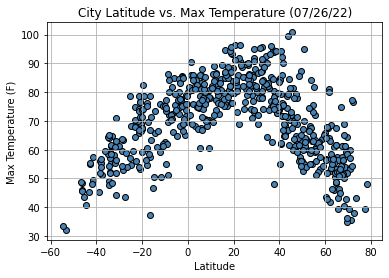

In [10]:
# Create Latitude vs. Temperature Plot
plt.scatter(weatherDF["Lat"], weatherDF["Max Temp"], facecolor="steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (07/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-')

# Save this figure before showing it below 
plt.savefig("../output_data/Fig1.png")
plt.show()

This figure tells that cities on latitude near 90 to -90 has lower temperature. The cities near latitude 0 and 20 shows higher temperatures.

## Latitude vs. Humidity Plot

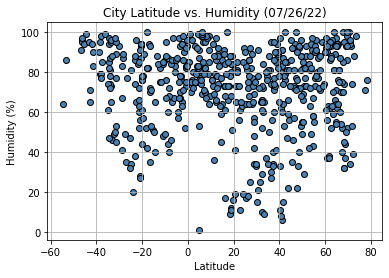

In [11]:
# Create Latitude vs. Humidity Plot
plt.scatter(weatherDF["Lat"], weatherDF["Humidity"], facecolor="steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (07/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-')

plt.savefig("../output_data/Fig2.png")
plt.show()

This figure tells that cities near latitude 0 shows less humidity than others. 

## Latitude vs. Cloudiness Plot

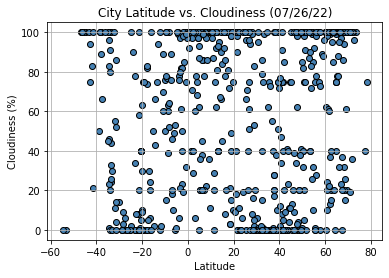

In [12]:
# Create Latitude vs. Temperature Plot
plt.scatter(weatherDF["Lat"], weatherDF["Cloudiness"], facecolor="steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (07/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-')

plt.savefig("../output_data/Fig3.png")
plt.show()

This is figure showing cloudiness. There are no direct relationship between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

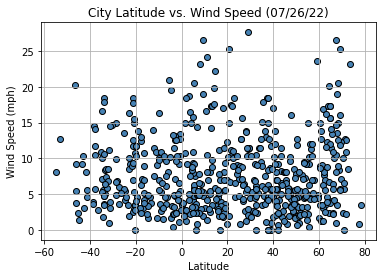

In [13]:
# Create Latitude vs. Temperature Plot
plt.scatter(weatherDF["Lat"], weatherDF["Wind Speed"], facecolor="steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (07/26/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-')

plt.savefig("../output_data/Fig4.png")
plt.show()

This figure shows wind speed data that is widely spread across the latitude. 

## Linear Regression

In [14]:
# Divide North and South Hempisheres Lats
northHemp = weatherDF.loc[(weatherDF['Lat'] > 0), :]
southHemp = weatherDF.loc[(weatherDF['Lat'] < 0), :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.44430546658588443


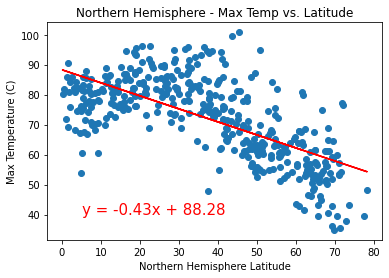

In [15]:
# For North Hemp Lat vs. Max Temp, set x and y
northMaxTemp = northHemp['Max Temp']
northLat = northHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(northLat, northMaxTemp, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(northLat, northMaxTemp)
regressValues = northLat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line 
plt.plot(northLat,regressValues,"r-")
plt.annotate(north_line_eq,(5,40),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin1.png")
plt.show()

There is moderate negative correlation between latitude and temperature of Northern hemisphere. Where cities in northen hemisphere that is close to latitude 0, they have higher temperture.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5249755202715368


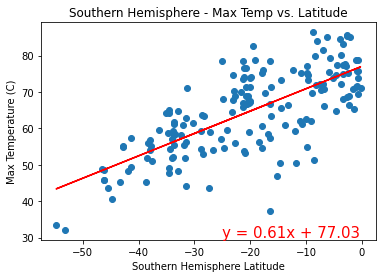

In [16]:
# For south Hemp Lat vs. Max Temp, set x and y
southMaxTemp = southHemp['Max Temp']
southLat = southHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(southLat, southMaxTemp, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(southLat, southMaxTemp)
regressValues = southLat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line 
plt.plot(southLat,regressValues,"r-")
plt.annotate(south_line_eq,(-25,30),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin2.png")
plt.show()


This figure shows moderate positive relationship. Similar to northern hempishere, cities close to latitude 0 has higher temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 1.7095286114358983e-05


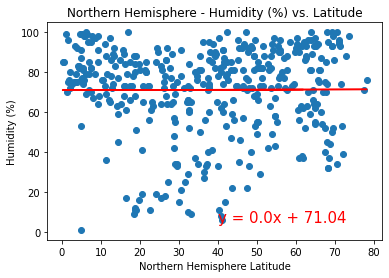

In [17]:
# For North Hemp Humidity vs. Latitude, set x and y
northHumidity = northHemp['Humidity']
northLat = northHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(northLat, northHumidity, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")

# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(northLat, northHumidity)
regressValues = northLat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line 
plt.plot(northLat,regressValues,"r-")
plt.annotate(north_line_eq,(40,5),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin3.png")
plt.show()

This figure shows very weak relationship between humidity and cities' latitude. There are correlation between humidity and latitude of cities in northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006054088783139155


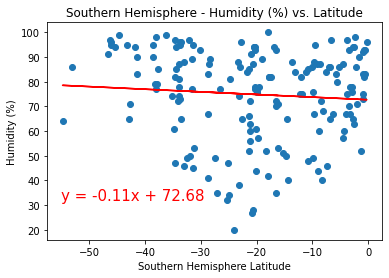

In [18]:
# For south Hemp Lat vs. Humidity, set x and y
southHumidity = southHemp['Humidity']
southLat = southHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(southLat, southHumidity, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")

# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(southLat, southHumidity)
regressValues = southLat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line 
plt.plot(southLat,regressValues,"r-")
plt.annotate(south_line_eq,(-55,32),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin4.png")
plt.show()

This figure shows a weak relationship between humidity and cities' latitude in southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0003544198803091936


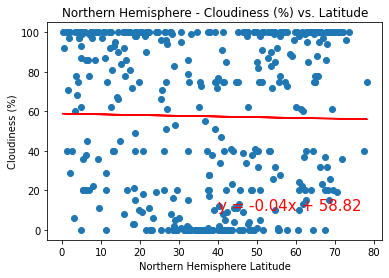

In [20]:
# For North Hemp cloudiness vs. Latitude, set x and y
northCloud = northHemp['Cloudiness']
northLat = northHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(northLat, northCloud, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(northLat, northCloud)
regressValues = northLat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line  
plt.plot(northLat,regressValues,"r-")
plt.annotate(north_line_eq,(40,10),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin5.png")
plt.show()

This figure shows weak relationship between cloudiness and citites' latitude in northern hemisphere. There aren't any strong relationship between two variables. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005050284498953398


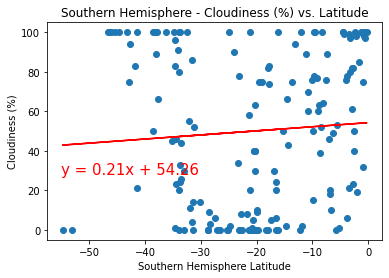

In [22]:
# For south Hemp Lat vs. Cloudiness, set x and y
southCloud = southHemp['Cloudiness']
southLat = southHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(southLat, southCloud, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")

# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(southLat, southCloud)
regressValues = southLat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line 
plt.plot(southLat,regressValues,"r-")
plt.annotate(south_line_eq,(-55,28),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin6.png")
plt.show()

This figure also shows weak relationship between cloudiness and latitude of cities in southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.000775997316306463


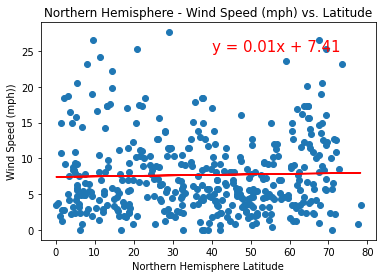

In [23]:
# For North Hemp wind speed vs. Latitude, set x and y
northWind = northHemp['Wind Speed']
northLat = northHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(northLat, northWind, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")

# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(northLat, northWind)
regressValues = northLat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line  
plt.plot(northLat,regressValues,"r-")
plt.annotate(north_line_eq,(40,25),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin7.png")
plt.show()

This figure shows very weak relationship between wind speed and the northern hemisphere latitude cities.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0048711928817595325


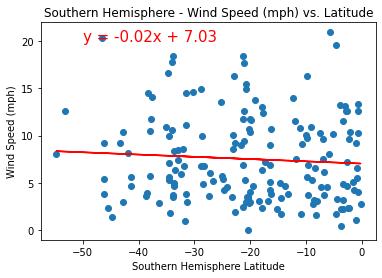

In [24]:
# For south Hemp Lat vs. Wind Speed, set x and y
southWind = southHemp['Wind Speed']
southLat = southHemp['Lat']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(southLat, southWind, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

# calcultate and plot linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(southLat, southWind)
regressValues = southLat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line 
plt.plot(southLat,regressValues,"r-")
plt.annotate(south_line_eq,(-50,20),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

# Save this figure before showing it below 
plt.savefig("../output_data/figlin8.png")
plt.show()

This figure also shows a very weak relationship between wind speed and southern hemisphere latitude cities. 